In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 

## **Accessing data**

In [2]:
adani = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/ADANIPOWER.NS?period1=1646742147&period2=1678278147&interval=1d&events=history&includeAdjustedClose=true')

In [3]:
adani 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-08,118.400002,121.449997,117.349998,118.699997,118.699997,27745685
1,2022-03-09,121.300003,122.699997,119.599998,121.300003,121.300003,21234389
2,2022-03-10,125.000000,125.699997,121.349998,122.500000,122.500000,20823339
3,2022-03-11,122.000000,123.500000,121.099998,121.800003,121.800003,14362421
4,2022-03-14,122.550003,123.099998,120.500000,122.150002,122.150002,14143340
...,...,...,...,...,...,...,...
245,2023-03-01,153.000000,153.600006,152.149994,153.600006,153.600006,1372548
246,2023-03-02,161.250000,161.250000,161.250000,161.250000,161.250000,1030431
247,2023-03-03,169.300003,169.300003,169.300003,169.300003,169.300003,648028
248,2023-03-06,177.750000,177.750000,177.750000,177.750000,177.750000,2877047


In [4]:
# Use Close 

data = adani['Close']

In [5]:
data

0      118.699997
1      121.300003
2      122.500000
3      121.800003
4      122.150002
          ...    
245    153.600006
246    161.250000
247    169.300003
248    177.750000
249    186.600006
Name: Close, Length: 250, dtype: float64

## **Split into Train and Test**

In [6]:
train = data[:200]

In [7]:
test = data[200:]

In [8]:
train

0      118.699997
1      121.300003
2      122.500000
3      121.800003
4      122.150002
          ...    
195    305.750000
196    290.500000
197    276.000000
198    262.200012
199    275.299988
Name: Close, Length: 200, dtype: float64

In [9]:
test

200    289.049988
201    303.500000
202    304.500000
203    299.549988
204    298.149994
205    294.750000
206    286.600006
207    288.750000
208    283.399994
209    287.700012
210    279.200012
211    276.200012
212    273.649994
213    278.700012
214    272.950012
215    281.950012
216    278.700012
217    277.549988
218    275.049988
219    273.200012
220    274.649994
221    261.000000
222    247.949997
223    235.550003
224    223.800003
225    212.649994
226    202.050003
227    191.949997
228    182.350006
229    173.250000
230    181.899994
231    172.800003
232    164.199997
233    156.000000
234    148.199997
235    140.800003
236    147.800003
237    155.149994
238    162.899994
239    171.000000
240    162.449997
241    154.350006
242    146.649994
243    139.350006
244    146.300003
245    153.600006
246    161.250000
247    169.300003
248    177.750000
249    186.600006
Name: Close, dtype: float64

## **Visualization**

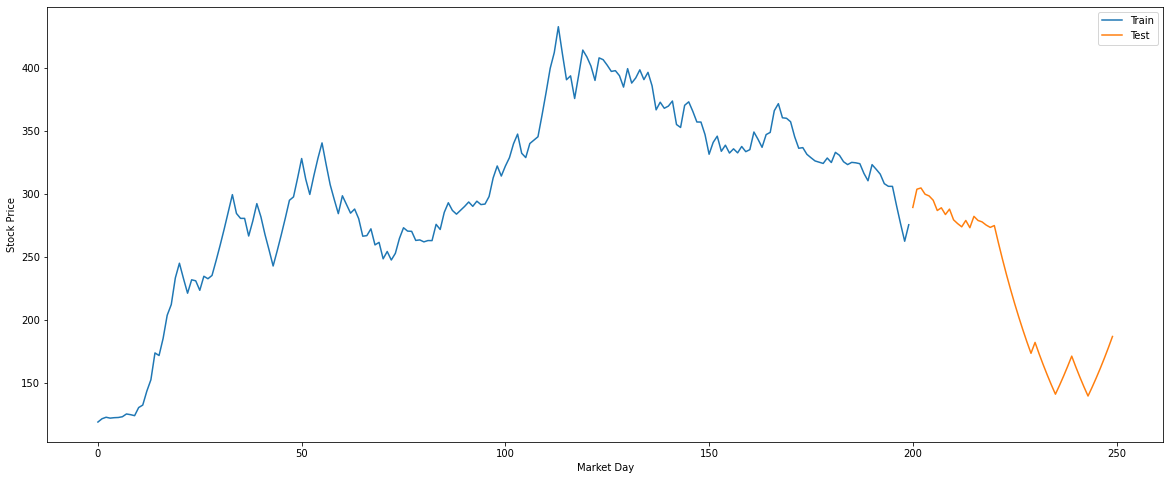

In [10]:
plt.figure(figsize=(20,8))
plt.plot(train)
plt.plot(test)
plt.xlabel('Market Day')
plt.ylabel('Stock Price')
plt.legend(['Train', 'Test']);

## **Standardization**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
mm = MinMaxScaler()

In [13]:
train_scaled = mm.fit_transform(np.array(train).reshape(-1,1))
test_scaled = mm.fit_transform(np.array(test).reshape(-1,1))

In [14]:
train_scaled

array([[0.        ],
       [0.00828555],
       [0.01210963],
       [0.00987892],
       [0.01099428],
       [0.01147229],
       [0.01338434],
       [0.02039516],
       [0.01864247],
       [0.01609306],
       [0.03664755],
       [0.04286169],
       [0.07807521],
       [0.10691524],
       [0.17479288],
       [0.16826005],
       [0.21159977],
       [0.27007648],
       [0.2971638 ],
       [0.36456344],
       [0.40168898],
       [0.36281072],
       [0.32584448],
       [0.35978333],
       [0.35723392],
       [0.333174  ],
       [0.36870617],
       [0.36249203],
       [0.37077758],
       [0.40822181],
       [0.44741876],
       [0.48868703],
       [0.53202675],
       [0.57520718],
       [0.52756533],
       [0.51513705],
       [0.51513705],
       [0.47052265],
       [0.50812618],
       [0.55242189],
       [0.51912048],
       [0.47434668],
       [0.43530913],
       [0.39467815],
       [0.43323772],
       [0.47370939],
       [0.51625243],
       [0.560

## **Converting Time Series Data to Regression Data**

In [15]:
X_train=[]
y_train=[]

# window_size=10

for i in range(10,200):
  X_train.append(train_scaled[i-10:i,0])
  y_train.append(train_scaled[i])

In [16]:
X_train

[array([0.        , 0.00828555, 0.01210963, 0.00987892, 0.01099428,
        0.01147229, 0.01338434, 0.02039516, 0.01864247, 0.01609306]),
 array([0.00828555, 0.01210963, 0.00987892, 0.01099428, 0.01147229,
        0.01338434, 0.02039516, 0.01864247, 0.01609306, 0.03664755]),
 array([0.01210963, 0.00987892, 0.01099428, 0.01147229, 0.01338434,
        0.02039516, 0.01864247, 0.01609306, 0.03664755, 0.04286169]),
 array([0.00987892, 0.01099428, 0.01147229, 0.01338434, 0.02039516,
        0.01864247, 0.01609306, 0.03664755, 0.04286169, 0.07807521]),
 array([0.01099428, 0.01147229, 0.01338434, 0.02039516, 0.01864247,
        0.01609306, 0.03664755, 0.04286169, 0.07807521, 0.10691524]),
 array([0.01147229, 0.01338434, 0.02039516, 0.01864247, 0.01609306,
        0.03664755, 0.04286169, 0.07807521, 0.10691524, 0.17479288]),
 array([0.01338434, 0.02039516, 0.01864247, 0.01609306, 0.03664755,
        0.04286169, 0.07807521, 0.10691524, 0.17479288, 0.16826005]),
 array([0.02039516, 0.01864247, 0.

In [17]:
y_train

[array([0.03664755]),
 array([0.04286169]),
 array([0.07807521]),
 array([0.10691524]),
 array([0.17479288]),
 array([0.16826005]),
 array([0.21159977]),
 array([0.27007648]),
 array([0.2971638]),
 array([0.36456344]),
 array([0.40168898]),
 array([0.36281072]),
 array([0.32584448]),
 array([0.35978333]),
 array([0.35723392]),
 array([0.333174]),
 array([0.36870617]),
 array([0.36249203]),
 array([0.37077758]),
 array([0.40822181]),
 array([0.44741876]),
 array([0.48868703]),
 array([0.53202675]),
 array([0.57520718]),
 array([0.52756533]),
 array([0.51513705]),
 array([0.51513705]),
 array([0.47052265]),
 array([0.50812618]),
 array([0.55242189]),
 array([0.51912048]),
 array([0.47434668]),
 array([0.43530913]),
 array([0.39467815]),
 array([0.43323772]),
 array([0.47370939]),
 array([0.51625243]),
 array([0.56086684]),
 array([0.56947099]),
 array([0.61679414]),
 array([0.66650735]),
 array([0.61440408]),
 array([0.57568517]),
 array([0.62332693]),
 array([0.66730404]),
 array([0.706

In [18]:
X_train.shape , y_train.shape

AttributeError: ignored

In [19]:
# Gives as error as X is a list 

# Coverting to np.array 

X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
X_train.shape , y_train.shape

((190, 10), (190, 1))

In [21]:
# Converting the Test Data 

X_test=[]
y_test=[]

# window_size=10

for i in range(10,50):
  X_test.append(test_scaled[i-10:i,0])
  y_test.append(test_scaled[i])

In [22]:
# Coverting to np.array 

X_test = np.array(X_test)
y_test = np.array(y_test)

In [23]:
X_test.shape, y_test.shape

((40, 10), (40, 1))

## **Model Building**

In [28]:
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(50,return_sequences=True, input_shape=(X_train.shape[1],1))) # means (10,1)
lstm.add(tf.keras.layers.Dense(1))

In [29]:
# Compiling

lstm.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),metrics=['mae'])

Epoch 1/100
6/6 [==============================] - 5s 16ms/step - loss: 0.4717 - mae: 0.6544
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.3150 - mae: 0.5312
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 0.2003 - mae: 0.4075
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 0.1222 - mae: 0.2837
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0941 - mae: 0.2434
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0903 - mae: 0.2446
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0776 - mae: 0.2186
Epoch 8/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0695 - mae: 0.1963
Epoch 9/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0649 - mae: 0.1848
Epoch 10/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0603 - mae: 0.1762
Epoch 11/100
6/6 [==============================] - 0s 13ms/step - lo

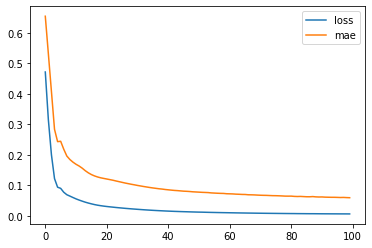

In [30]:
#Training 

tf.random.set_seed(10)
hist=lstm.fit(X_train, y_train, epochs=100)
pd.DataFrame(hist.history).plot();

## **Evaluation of the Model**

In [32]:
lstm.evaluate(X_test,y_test)

2/2 [==============================] - 1s 11ms/step - loss: 0.0520 - mae: 0.1762


[0.052035171538591385, 0.1761968731880188]

### The (train_loss , test_loss) = (0.0065 , 0.0520), thus there is overfitting

In [33]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dense (Dense)               (None, 10, 1)             51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
